# Comparing Annual Changes in Sea Surface Temperature and Polar Sea Ice Concentrations 

## EDS 220, Fall 2021



## Authors

- **Peter Menzies**, UC Santa Barbara (petermenzies@bren.ucsb.edu) <br>
https://petermenzies.github.io/


- **Juliet Cohen**, UC Santa Barbara (jscohen@bren.ucsb.edu) <br>
https://julietcohen.github.io/


- **Ryan Munnikhuis**, UC Santa Barbara (Rmunnikhuis@ucsb.edu) <br>
https://ryanmunnikhuis.github.io/


## Table of Contents

[1. Purpose](#purpose)

[2. Dataset Description](#overview)

[3. Data I/O](#io)

[4. Metadata Display and Basic Visualization](#display)

[5. Use Case Examples](#usecases)

[6. Create Binder Environment](#binder)

[7. References](#references)

<a id='purpose'></a> 
### Notebook Purpose

This notebook is intended to introduce you into working with, subsetting, and visualizing oceanic and ice geodatasets. For this exercise, we'll be subsetting and visualsing sea surface temperatures (SST) from the NOAA Optimum Interpolation 1/4 Degree Daily Sea Surface Temperature (OISST) Analysis, Version 2) and sea ice concentrations (SIC) data from the Monthly Mean Hadley Centre Sea Ice and SST dataset version 1 (HadISST1) data set. 

At the end of the lab, we will ideally have: 

- A gif showing changes of sea surface temperatures over a 40-year timeframe; 


- A gif showing of changes of sea ice concentrations over a 40-year timeframe; and


- A graph showing the trend in sea surface temperatures and sea ice concentrations over time.

<a id='overview'></a> 
### Datasets

In this lab, we'll be using data from two sources. 
- SST: NOAA's 1/4° Daily Optimum Interpolation Sea Surface Temperature (OISST) version 2, or OISSTv2
- SIC: Monthly Mean Hadley Centre Sea Ice and SST dataset version 1 (HadISST1)

Data Google Drive: https://drive.google.com/drive/folders/1bdVrH6EB0JAjreb0xAbcb6Nps5oyW2eW?usp=sharing

A description of each dataset is given below: 

### Sea Surface Temperature Data 

The NOAA 1/4° daily Optimum Interpolation Sea Surface Temperature (daily OISST) Climate Data Record (CDR) provides complete ocean temperature fields constructed by combining bias-adjusted observations from different platforms (satellites, ships, buoys) on a regular global grid, with gaps filled in by interpolation. The main input source is satellite data from the Advanced Very High-Resolution Radiometer (AVHRR), which provides high temporal-spatial coverage from late 1981 to–present. 
This dataset is stored as NetCDF files (.nc files) that include latitude and longitude coordinates, temperatures, and dates.

Data source and metadata: NOAA National Centers for Environemntal Information https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00844/html

NOAA Sea Surface Temperature Optimum Interpolation methods: https://www.ncei.noaa.gov/products/climate-data-records/sea-surface-temperature-optimum-interpolation


### Sea Ice Concentration Data

The Monthly Mean Hadley Centre Sea Ice and SST dataset version 1 (HadISST1) is one half of the merged Hadley-OI sea surface temperature (SST) and sea ice concentration (SIC) dataset. The merged product provides monthly global mean sea surface temperature and sea ice concentration data from 1870 to the present. The merging procedure was designed to take full advantage of the higher-resolution SST information found in version 2 of the NOAA weekly optimum interpolation (OI) SST analysis, the other half of the merged dataset. The combined dataset blends historical SST and modern SST observations from ships, buoys, drifters, and sea ice observations, partly from historical ship- and air-borne and partly from satellite data.This dataset is stored as NetCDF files (.nc files) that include latitude and longitude coordinates, temperatures, and dates. Sea ice concentration is defined as ice located at the poles (approximately above and below 60 degrees latitiude) regardless if it is continential or oceanic.

Data source and metadata: UCAR/NCAR - DASH Repository
https://dashrepo.ucar.edu/dataset/158_asphilli.html

Journal of Climate article explaining why the datsets were merged: https://journals.ametsoc.org/view/journals/clim/21/19/2008jcli2292.1.xml

## Dataset Input/Output

### Configure Environment

We will be using xarray, rasterio, pandas, matplotlib, rioxarray, imaegio, and glob Python packages.

In [1]:
#Configure Python Environment
import xarray as xr
import rasterio as rio
import pandas as pd 
from rasterio.plot import show
import matplotlib.pyplot as plt
import rioxarray
import imageio
import glob

### Dataset Parameters 

We have preloaded subsetted data into binder to avoid binder size conflicts and to minimize time needed downloading data. We'll look at a 20 year timeframe for both sea surface temperatures and sea ice concentrations. Since we've already (briefly) gone over how to visualize SST in our last presentation, we'll just show you the code that and walk you through visualizing sea ice data.    

### Use Case Examples 

While static maps are useful for oberserving conditons at a single point in time (or an average of time span), it can sometimes be helpful to visual the change in geospatial data from year to year. This exercise is intended to provide you with multiple examples of how to animate a timeseries. In addition, this lab will also show you one method to plot two datasets on the same graph.  

## Part One: Sea Surface Temperature 

In [2]:
# Example commands to open a single NetCDF file and view the metadata

# use xarray to load in the datafile
data_example = xr.open_dataset('Data/oisst-avhrr-v02r01.19811017.nc')
# use head() to view the metadata associated with this file
data_example.head()

<xarray.Dataset>
Dimensions:  (time: 1, zlev: 1, lat: 5, lon: 5)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 -88.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125
  * time     (time) datetime64[ns] 1981-10-17T12:00:00
  * zlev     (zlev) float32 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
    sst      (time, zlev, lat, lon) float32 ...
Attributes: (12/37)
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.19811017.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    cdm_data_type:              Grid
    ...                         ...
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR
    Conventions:                CF-1.6, ACDD-1.3
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...

In [4]:
filenames = sorted(glob.glob('Data/oisst-avhrr-v02r01*'))

new = [xr.open_dataset(f).mean('lon').mean('lat').to_dataframe(dim_order=None) for f in filenames]

df = pd.concat(new)

df

,,anom,err,ice,sst
time,zlev,,,,
1981-10-17 12:00:00,0.0,-0.106241,0.258860,0.517563,13.387220
1982-10-17 12:00:00,0.0,-0.144393,0.241713,0.515015,13.349076
1983-10-17 12:00:00,0.0,-0.153313,0.252063,0.523977,13.340151
1984-10-17 12:00:00,0.0,-0.193376,0.258957,0.502144,13.300095
1985-10-17 12:00:00,0.0,-0.255830,0.247360,0.541527,13.237632
1986-10-17 12:00:00,0.0,-0.196442,0.252994,0.505464,13.297026
1987-10-17 12:00:00,0.0,-0.163547,0.240886,0.528755,13.329916
1988-10-17 12:00:00,0.0,-0.165522,0.253578,0.538065,13.327940
1989-10-17 12:00:00,0.0,-0.164839,0.261001,0.520826,13.328619


In [5]:
# subset the columns
df_subset = df['sst']
# drop NA's
df_subset_no_na = df_subset.dropna()
# group by time and take the annual means
sst_means = df_subset_no_na.groupby('time').mean('sst')
# convert to a df
sst_means_df = sst_means.to_frame()
# reset the 'time' from an index to a column
sst_means_df = sst_means_df.reset_index()
sst_means_df

,time,sst
0,1981-10-17 12:00:00,13.387220
1,1982-10-17 12:00:00,13.349076
2,1983-10-17 12:00:00,13.340151
3,1984-10-17 12:00:00,13.300095
4,1985-10-17 12:00:00,13.237632
5,1986-10-17 12:00:00,13.297026
6,1987-10-17 12:00:00,13.329916
7,1988-10-17 12:00:00,13.327940
8,1989-10-17 12:00:00,13.328619
9,1990-10-17 12:00:00,13.417130


In [5]:
sst_means_df['time'] = pd.to_datetime(sst_means_df['time'])

In [6]:
print(sst_means_df['time'].dtype)

datetime64[ns]


In [7]:
sst_means_df['year'] = pd.DatetimeIndex(sst_means_df['time']).year
sst_means_df

,time,sst,year
0,1981-10-17 12:00:00,13.386664,1981
1,1982-10-17 12:00:00,13.396963,1982
2,1983-10-17 12:00:00,13.377075,1983
3,1984-10-17 12:00:00,13.326571,1984
4,1985-10-17 12:00:00,13.269166,1985
5,1986-10-17 12:00:00,13.338634,1986
6,1987-10-17 12:00:00,13.368731,1987
7,1988-10-17 12:00:00,13.340157,1988
8,1989-10-17 12:00:00,13.335047,1989
9,1990-10-17 12:00:00,13.426472,1990


In [8]:
# List of years that data were collected to read in .nc files and to title maps later on
years = range(1981, 2022)

# Empty list to populate with tif file names
images = []

In [9]:
# Loop to read in datasets and and export as rasterized tiffs
for i in years:
    
    dataset = 'Data/oisst-avhrr-v02r01.' + str(i) + '1017.nc'
    
    nc = xr.open_dataset(dataset)
    
    nc_projected = nc.rio.write_crs(4326, inplace=True)
    
    sst = nc_projected["sst"].rio.set_spatial_dims('lon', 'lat')
    
    sst = sst.rename({'lat':'latitude', 'lon':'longitude'})
    
    sst['time'] = pd.to_datetime(sst['time'], format='%Y%m%d')
    
    sst = sst.squeeze()
    
    filename = 'Data/noaa_sst_' + str(i) + '.tif'
    
    sst.rio.to_raster(filename)
    
    images.append(filename)

In [10]:
# Function to render the tiffs we exported
def raster_show(raster):
    
    open_rast = rio.open(raster)
    
    plt.figure(figsize=(10,10), dpi=150)
    
    plt.imshow(open_rast.read(1),
               origin='lower',
               cmap='plasma',
               extent=[-180, 180, -90, 90])

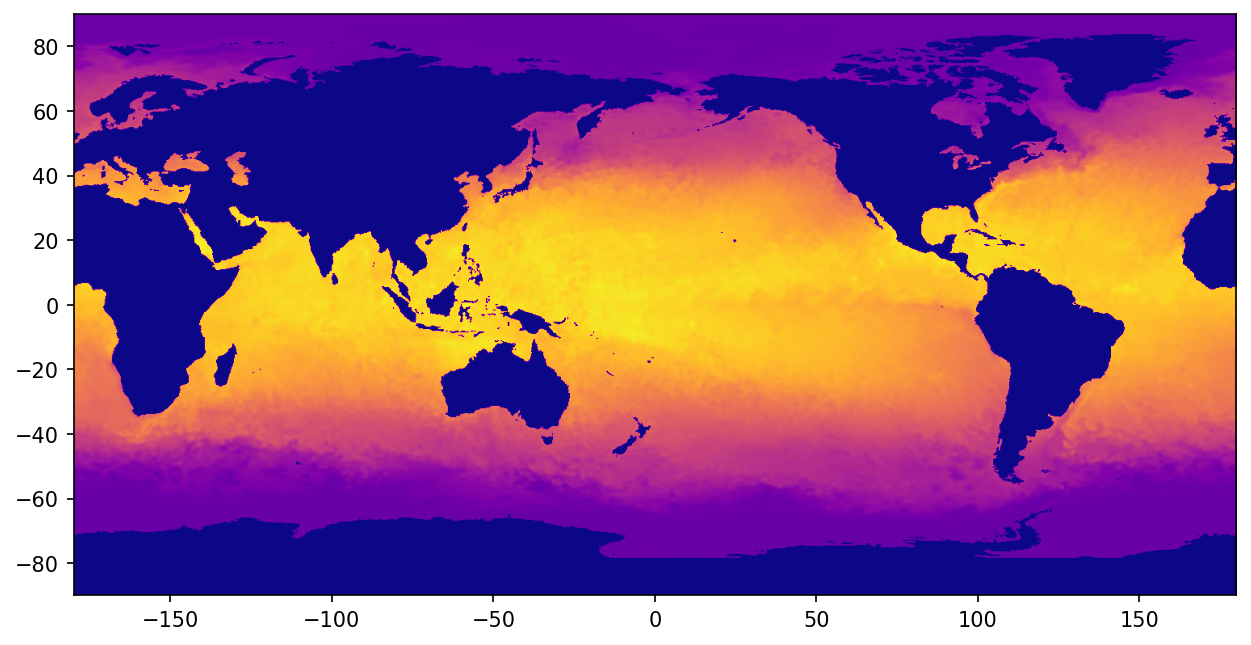

In [12]:
raster_show('Data/noaa_sst_1981.tif')

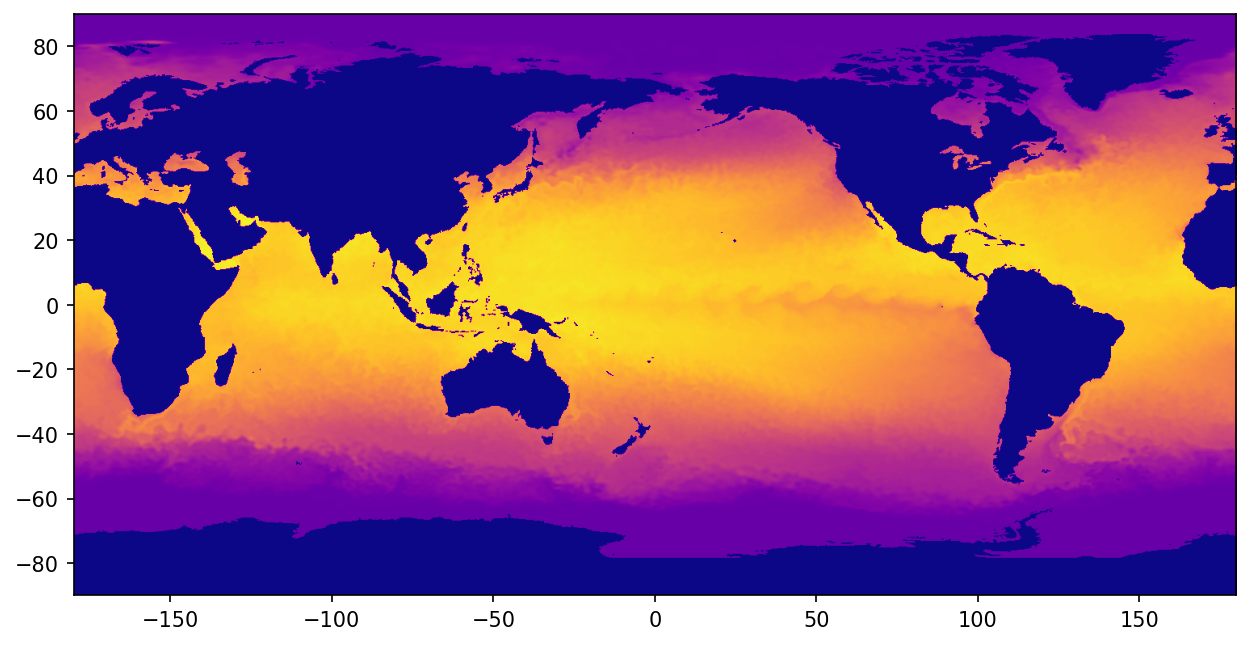

In [13]:
raster_show('Data/noaa_sst_2021.tif')

In [14]:
png_rasters = []

In [17]:
 %%capture
 
 # Loop to export as png and create list of png file names
 for i in range(0, 41):
    raster_show(images[i])
    png = images[i] + '.png'
    plt.title(years[i])
    plt.savefig(png)
    png_rasters.append(png)

TypeError: imsave() missing 1 required positional argument: 'arr'

<Figure size 1500x1500 with 0 Axes>

In [ ]:
# Created composite gif from pngs
png_imageio = []

for filename in png_rasters:
    png_imageio.append(imageio.imread(filename))
imageio.mimsave('Data/sst_81_21.gif', png_imageio, **{'duration':0.4})

## Part Two: Sea Ice Concentrations 

In [ ]:
# Example commands to open a single NetCDF file and view the metadata

# use xarray to load in the datafile
data_example_2 = xr.open_dataset('Data/MODEL.ICE.HAD187001-198110.OI198111-202109.nc')
# use head() to view the metadata associated with this file
data_example_2.head()

<xarray.Dataset>
Dimensions:    (time: 5, lat: 5, lon: 5)
Coordinates:
  * lat        (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5
  * time       (time) datetime64[ns] 1870-01-16T12:00:00 ... 1870-05-16T12:00:00
Data variables:
    SEAICE     (time, lat, lon) float32 ...
    date       (time) int32 ...
    date_frac  (time) float64 ...
    datesec    (time) int32 ...
Attributes:
    creation_date:             Mon Apr  7 14:46:31 MDT 2008
    creator:                   Dennis Shea, CGD
    story:                     \nClara Deser and Jim Hurrell wanted a SST and...
    title:                     ICE: Merged: HADLEY 187001-198110 with  NCEP O...
    history:                   Wed Oct 13 14:14:32 2021: ncrcat MODEL.ICE.HAD...
    nco_openmp_thread_number:  1
    NCO:                       "4.5.2"

In [ ]:
ds_ice = xr.open_dataset("Data/MODEL.ICE.HAD187001-198110.OI198111-202109.nc")

In [ ]:
ice = ds_ice.rio.write_crs(4326, inplace=True)

In [ ]:
ice_time = pd.DataFrame(columns=['year', 'ice_conc'])

In [ ]:
ice_year = []

ice_conc = []

In [ ]:
for i in range(0, 40):
    
    ice_i = float(ice['SEAICE'][1341 + (12 * i)].mean())

    year_i = 1981 + i

    ice_year.append(year_i)

    ice_conc.append(ice_i)

In [ ]:
ice_time['year'] = ice_year
ice_time['ice_conc'] = ice_conc

In [ ]:
ice_time

,year,ice_conc
0,1981,24.723967
1,1982,24.581732
2,1983,24.599352
3,1984,23.901114
4,1985,23.986412
5,1986,24.489408
6,1987,24.082897
7,1988,24.113588
8,1989,23.921965
9,1990,23.706593


Text(0, 0.5, 'Ice concentration')

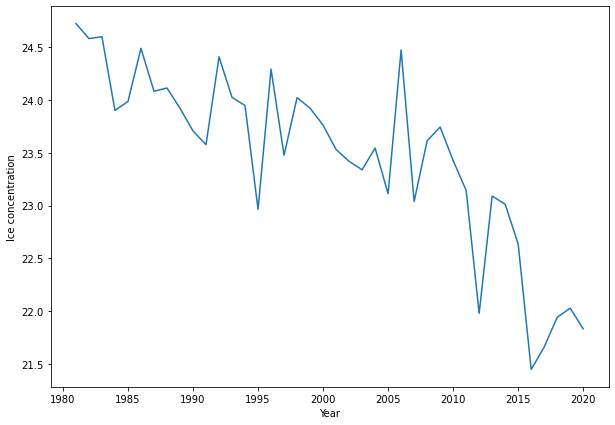

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(ice_time['year'], ice_time['ice_conc'])
plt.xlabel('Year')
plt.ylabel('Ice concentration')

## Part Three: Comparing Datasets 

No handles with labels found to put in legend.


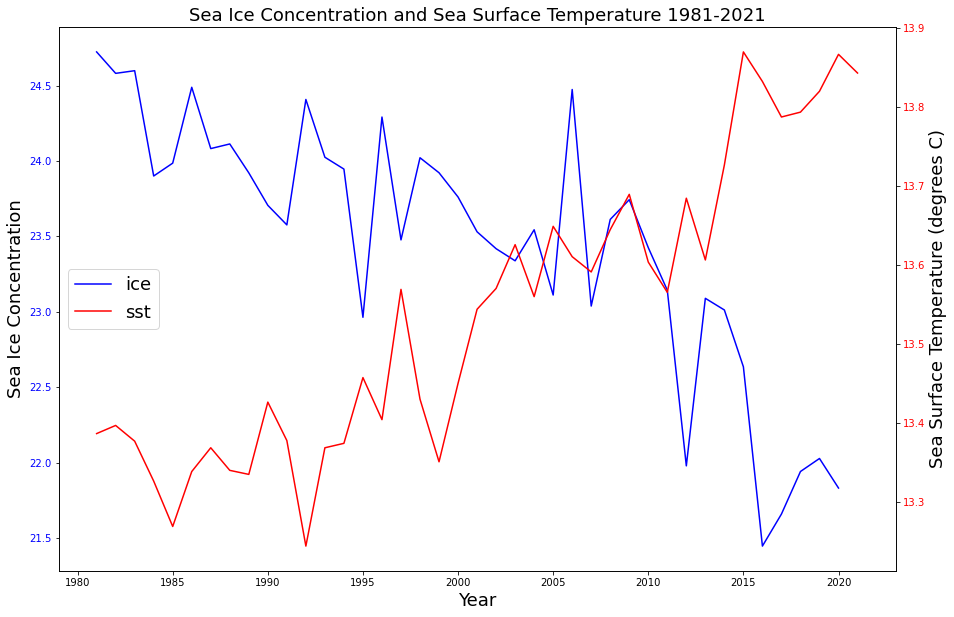

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ice, = ax.plot(ice_time['year'], ice_time['ice_conc'], color='blue')
ax.tick_params(axis='y', labelcolor='blue')
plt.xlabel('Year', fontsize = 18)
ax.set_ylabel('Sea Ice Concentration', fontsize = 18)
ax2 = ax.twinx()
sst, = ax2.plot(sst_means_df['year'], sst_means_df['sst'], color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('Sea Surface Temperature (degrees C)', fontsize = 18)
leg1 = ax.legend(loc='center left')
leg2 = ax.legend([ice, sst],['ice','sst'], loc='center left', fontsize = 18)
ax.set_title('Sea Ice Concentration and Sea Surface Temperature 1981-2021', fontsize = 18)
plt.show()

<a id='usecases'></a> 
### Use Case Examples

This is the "meat" of the notebook, and what will take the majority of the time to present in class. This section should provide:
1) A plain-text summary (1-2 paragraphs) of the use case example you have chosen: include the target users and audience, and potential applicability. For example, the Week 7 SST exercise might discuss how the state of the ENSO system can be important for seasonal weather forecasts/coral bleaching outlooks, then mention the typical diagnostics associated with ENSO (i.e. identification of El Nino/La Nina events).

2) Markdown and code blocks demonstrating how one walks through the desired use case example. This should be similar to the labs we've done in class: you might want to demonstrate how to isolate a particularly interesting time period, then create an image showing a feature you're interested in, for example.

3) A discussion of the results and how they might be extended on further analysis. For example, we are doing El Nino/La Nina composites in class; a natural extension might be to look at individual events to see what their particular impacts were. Or if there are data quality issues which impact the results, you could discuss how these might be mitigated with additional information/analysis.

Just keep in mind, you'll have roughly 20 minutes for your full presentation, and that goes surprisingly quickly! Probably 2-3 diagnostics is the most you'll be able to get through (you could try practicing with your group members to get a sense of timing).


<a id='binder'></a> 
### Create Binder Environment

The last step is to create a Binder environment for your project, so that we don't have to spend time configuring everyone's environment each time we switch between group presentations. Instructions are below:

 - Assemble all of the data needed in your Github repo: Jupyter notebooks, a README file, and any datasets needed (these should be small, if included within the repo). Larger datasets should be stored on a separate server, and access codes included within the Jupyter notebook as discussed above. 
 
 - Create an _environment_ file: this is a text file which contains information on the packages needed in order to execute your code. The filename should be "environment.yml": an example that you can use for the proper syntax is included in this template repo. To determine which packages to include, you'll probably want to start by displaying the packages loaded in your environment: you can use the command `conda list -n [environment_name]` to get a list.
 
 More information on environment files can be found here:
 https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#

 - Create Binder. Use http://mybinder.org to create a  URL for your notebook Binder (you will need to enter your GitHub repo URL). You can also add a Launch Binder button directly to your GitHub repo, by including the following in your README.md:

```
launch with myBinder
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/<path to your repo>)
```

<a id='references'></a> 
### References

List relevant references. Here are some additional resources on creating professional, shareable notebooks you may find useful:

1. Notebook sharing guidelines from reproducible-science-curriculum: https://reproducible-science-curriculum.github.io/publication-RR-Jupyter/
2. Guide for developing shareable notebooks by Kevin Coakley, SDSC: https://github.com/kevincoakley/sharing-jupyter-notebooks/raw/master/Jupyter-Notebooks-Sharing-Recommendations.pdf
3. Guide for sharing notebooks by Andrea Zonca, SDSC: https://zonca.dev/2020/09/how-to-share-jupyter-notebooks.html
4. Jupyter Notebook Best Practices: https://towardsdatascience.com/jupyter-notebook-best-practices-f430a6ba8c69
5. Introduction to Jupyter templates nbextension: https://towardsdatascience.com/stop-copy-pasting-notebooks-embrace-jupyter-templates-6bd7b6c00b94  
    5.1. Table of Contents (Toc2) readthedocs: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/toc2/README.html  
    5.2. Steps to install toc2: https://stackoverflow.com/questions/23435723/installing-ipython-notebook-table-of-contents
6. Rule A, Birmingham A, Zuniga C, Altintas I, Huang SC, et al. (2019) Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks. PLOS Computational Biology 15(7): e1007007. https://doi.org/10.1371/journal.pcbi.1007007. Supplementary materials: example notebooks (https://github.com/jupyter-guide/ten-rules-jupyter) and tutorial (https://github.com/ISMB-ECCB-2019-Tutorial-AM4/reproducible-computational-workflows)
7. Languages supported by Jupyter kernels: https://github.com/jupyter/jupyter/wiki/Jupyter-kernels
8. EarthCube notebooks presented at EC Annual Meeting 2020: https://www.earthcube.org/notebooks
9. Manage your Python Virtual Environment with Conda: https://towardsdatascience.com/manage-your-python-virtual-environment-with-conda-a0d2934d5195
10. Venv - Creation of Virtual Environments: https://docs.python.org/3/library/venv.html